# Desafío Regresión desde el ambiente de aprendizaje de máquinas

__Integrantes:__ 
- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo

__Contexto__

Para esta actividad utilizaremos un subconjunto de 25 items de la International Personality Item

Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características Amabilidad, Escrupolisidad, Extroversión, Neuroticismo, Apertura. Los individuos deben responder qué tan
adecuada es la oración respecto a su personalidad en base a 6 categorías:

1. No me representa para nada.
2. No me representa.
3. Algunas cosas no me representan.
4. Algunas cosas me representan.
5. Me representa.
6. Me representa completamente.

Las 25 preguntas son:

- `A1` Soy indiferente a los sentimientos de otros.
- `A2` Me preocupo del bienestar de otros.
- `A3` Sé cómo confortar a otros.
- `A4` Me agradan los niños.
- `A5` Hago sentir tranquila a la gente.
- `C1` Soy exacto en mi trabajo.
- `C2` Sigo con mis tareas hasta que todo esté perfecto.
- `C3` Hago cosas siguiendo un plan.
- `C4` Hago cosas con el mínimo esfuerzo.
- `C5` Pierdo mi tiempo.
- `E1` No hablo mucho con las personas.
- `E2` Me es dificil acercarme a otros.
- `E3` Sé cómo cautivar gente.
- `E4` Hago amigos de forma fácil.
- `E5` Puedo tomar el cargo de las cosas.
- `N1` Me enojo con facilidad.
- `N2` Me irrito con facilidad.
- `N3` Tengo cambios de humor frecuentes.
- `N4` Usualmente me siento melancólico.
- `N5` Entro en pánico con facilidad.
- `O1` Estoy lleno de ideas.
- `O2` Evito leer material difícil.
- `O3` Tiendo a llevar la conversación a niveles más altos.
- `O4` Dedico tiempo a la reflexión de cosas.
- `O5` No profundizaré sobre una materia específica.

Se registraron una serie de covariables sobre características demográficas de los encuestados:
- `gender` Hombre = 1, Mujer =2.
- `education` 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa, 5 = Estudios de Postgrado.
- `age` Edad en Años.

Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos.

## Lectura de archivos

- Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
- Importe la base de datos bfi.csv y asígnela a un objeto df.
- Solicite las primeras 5 observaciones con head.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import factor_analyzer as fact
import missingno as msngo

from IPython.display import display, Markdown

In [2]:
df = pd.read_csv("bfi.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 61617 to 67560
Data columns (total 28 columns):
A1           2784 non-null float64
A2           2773 non-null float64
A3           2774 non-null float64
A4           2781 non-null float64
A5           2784 non-null float64
C1           2779 non-null float64
C2           2776 non-null float64
C3           2780 non-null float64
C4           2774 non-null float64
C5           2784 non-null float64
E1           2777 non-null float64
E2           2784 non-null float64
E3           2775 non-null float64
E4           2791 non-null float64
E5           2779 non-null float64
N1           2778 non-null float64
N2           2779 non-null float64
N3           2789 non-null float64
N4           2764 non-null float64
N5           2771 non-null float64
O1           2778 non-null float64
O2           2800 non-null int64
O3           2772 non-null float64
O4           2786 non-null float64
O5           2780 non-null float64
gender       28

In [3]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Preprocesamiento

- Elimine las columnas redundantes de la base, tal como `Unnamed: 0`.
- Analice el patrón de datos perdidos con missingno . Comente cuáles son las principales variables con mayores tasas de valores perdidos. __Respuesta:__ A partir de la matriz generada con missingno, se observa que la mayor cantidad de datos pérdidos se encuentran en la columna education. Lo que se corroborá viendo el porcentaje de datos pérdidos con la función isna() casi un 8%, le sigue N4 con un 1.2%.
- Genere un nuevo objeto donde almacenará la base sin valores perdidos.

,perdidos_porcentaje,perdidos
education,7.964286,223
N4,1.285714,36
N5,1.035714,29
O3,1.000000,28
A2,0.964286,27


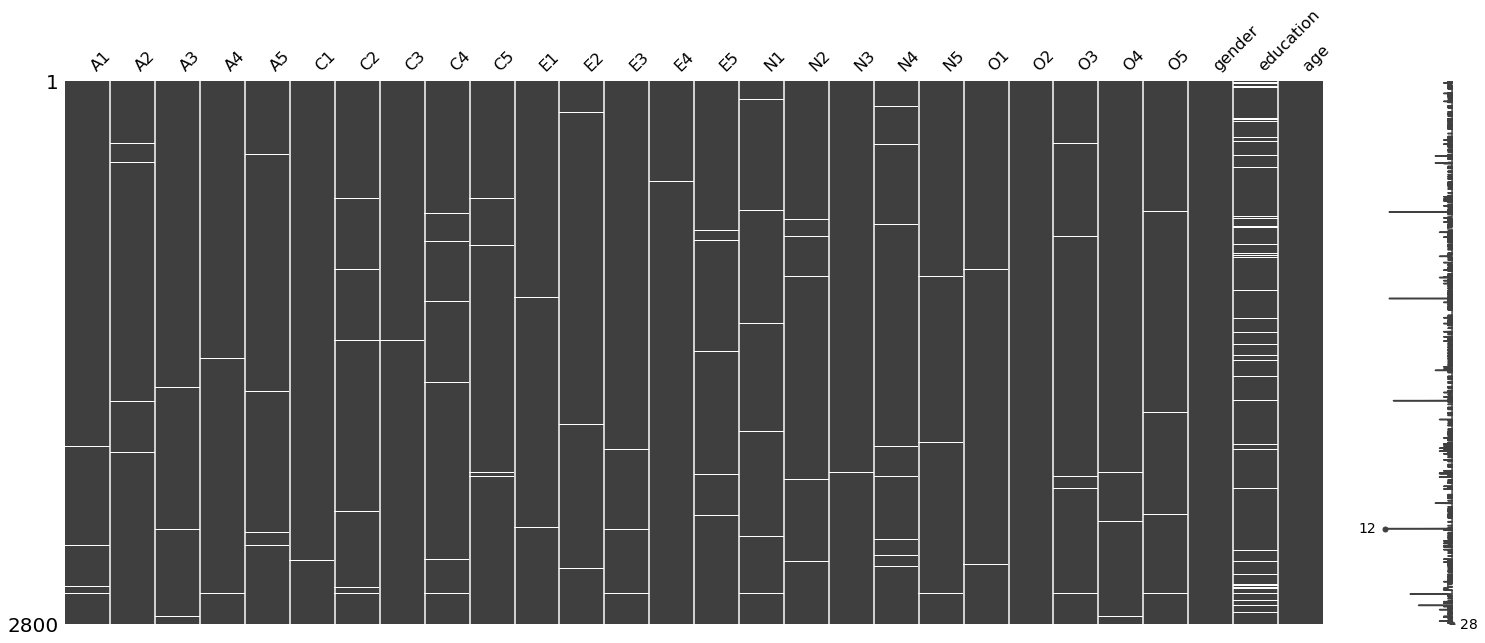

In [4]:
# Grafica matriz de valores pérdidos

msngo.matrix(df)

# Obtiene número y porcentaje de valores pérdidos
df_perdidos = pd.DataFrame(
    {
        "perdidos_porcentaje": df.isna().sum()*100/len(df),
        "perdidos": df.isna().sum()
    }
)

display(df_perdidos.sort_values("perdidos_porcentaje", ascending=False)[:5])

# Elimina valores pérdidos
df_NN = df.dropna()

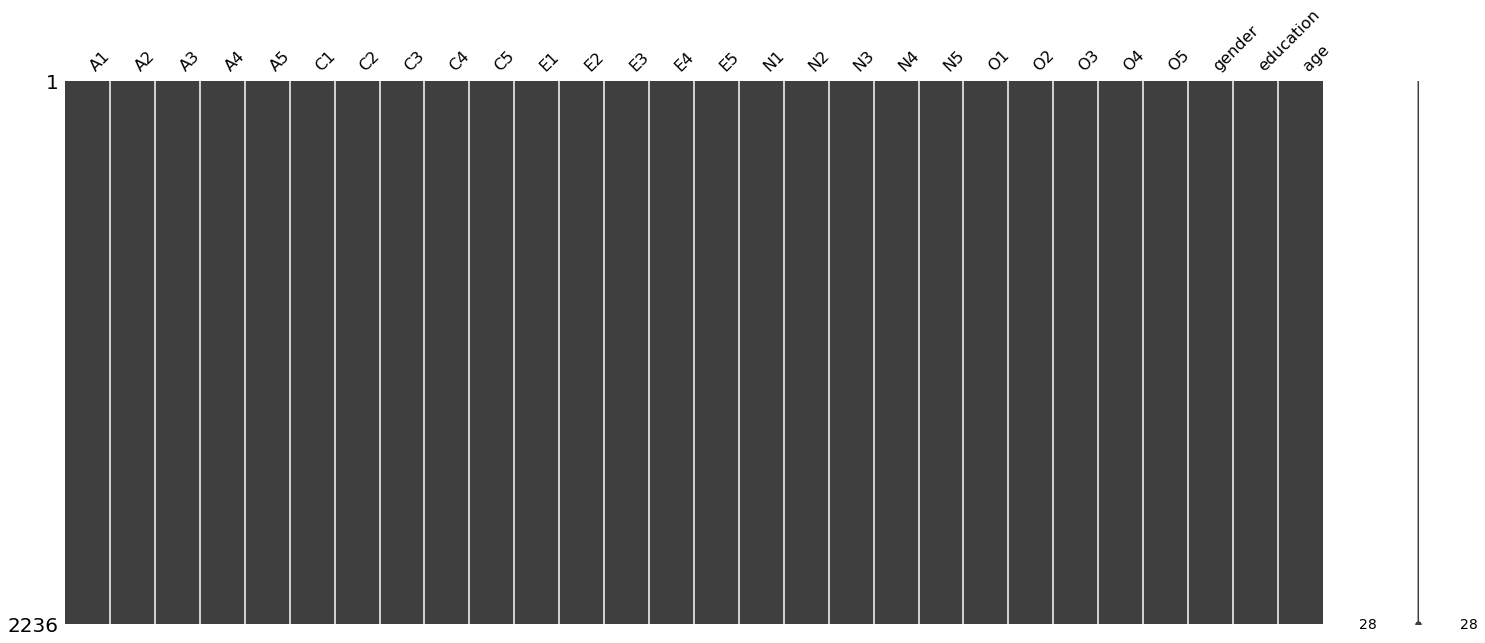

In [5]:
# Verifica que no existen valores pérdidos luego de aplicar dropna()
msngo.matrix(df_NN)

## Descripción

- Separe en un nuevo objeto `DataFrame` la batería de preguntas a extraer.
- Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
- Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con `heatmap`. Comente sobre los principales patrones de correlación entre las preguntas de la batería.

__Respuesta:__ 

Cada subgrupo de preguntas (A, C, E, N y O) tiene relación con un mismo tema. A priori, dentro de cada subgrupo hay preguntas muy similares, que podrían generar la misma respuesta en los encuestados, o que se tiende a pensar que deberían tener mucha relación entre sí, estas son:
1. A2, A3 y A5.
2. C1, C2, y C3.
3. C4 y C5.
4. E1 y E2.
5. E3 y E4.
6. N1, N2 y N3.

También hay preguntas que, a priori se podría pensar que deberían tener una correlación negativa.

7. A1 con A2, A3 y A5.
8. C1, C2 y C3 con C4 y C5.
9. E4 y E2.
10. O2 con O3.
11. O3 con O5.

Revisando el heatmap se confirma una correlación mayor (positiva/negativa) en los grupos de preguntas previamente mencionados. Y se agregan a la lista de alta correlación, los siguientes grupos que no se habían esperado antes:

- E5 con N3 y N4. No se veía claramente una relación de E5 con el resto de las preguntas.
- N4 con N1, N2, N3 y N5. Melancolía no se veía relacionado directamente con los otros estados/sentimientos.
- N5 con N1, N2, N3 y N4. Entrar en pánico no se veía relacionado directamente con los otros estados/sentimientos.

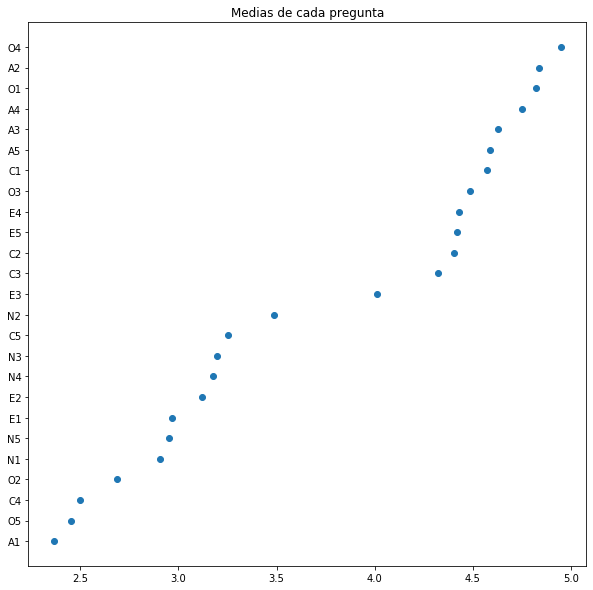

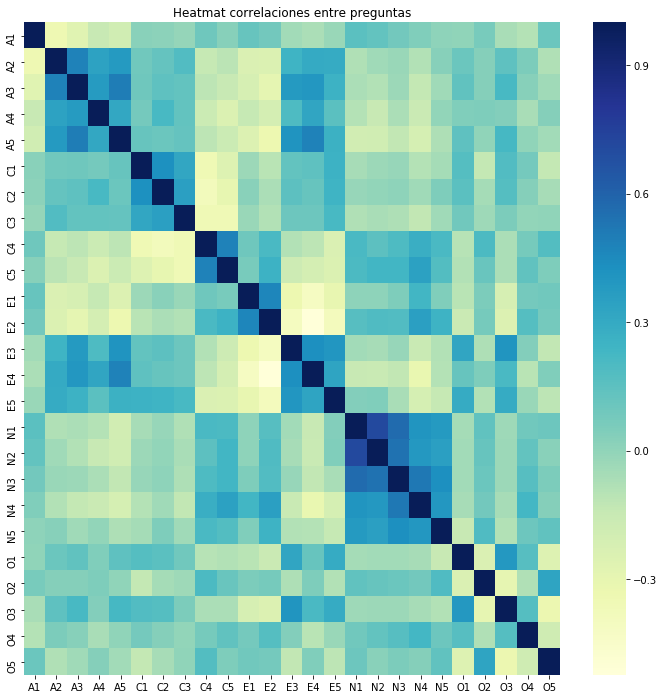

In [6]:
# Separa la batería de preguntas a extraer
df_preguntas = df_NN.loc[:, "A1":"O5"]

# Calcula medias y grafica
variables = []
medias = []


for var in df_preguntas:
    variables.append(var)
    medias.append(df_preguntas[var].mean())

medias = pd.DataFrame({
    "var": variables,
    "mean": medias
}).sort_values(by=['mean'])  


plt.figure(figsize=(10, 10))
plt.title("Medias de cada pregunta")
plt.plot(medias["mean"], medias["var"], 'o')

# Realiza heatmap de correlaciones

plt.figure(figsize=(12, 12))
plt.title("Heatmat correlaciones entre preguntas")
sns.heatmap(data=df_preguntas.corr(), cmap='YlGnBu')

## Extracción de factores

- Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer- Olkin. Comente los resultados. 
    - __Respuesta:__ 
        - Al aplicar la prueba de esferacidad de errores de Bartlett se concluye que la matriz de correlaciones no está relacionada con una matriz de identidad. Por lo que se puede seguir con el análisis de factores.
        - Al aplicar la prueba de muestreo KMO, todas las preguntas superan el puntaje de 0.7, por lo que se pueden extraer factores.
- Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
- Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
- Refactorice el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
- Extraiga las cargas del modelo e identifique qué items están asociados a cada factor. Comente sobre qué significa cada factor construído.

__Prueba de esferacidad de errores de Bartlett__

(16509.673550497195, 0.0)

__Prueba de muestreo Kaiser-Meyer-Olkin (KMO)__

,var,KMO
0,A1,0.737832
1,A2,0.834263
2,A3,0.871581
3,A4,0.870424
4,A5,0.900619
5,C1,0.838103
6,C2,0.788420
7,C3,0.849463
8,C4,0.823646
9,C5,0.861888


__KMO global:__ 0.8468295031833752

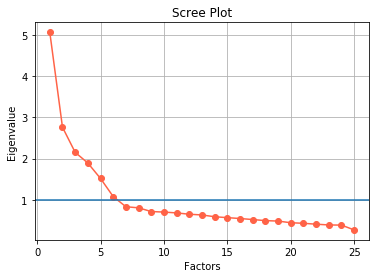

A partir del grafico se estiman 6 dimensiones

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation=None, rotation_kwargs={},
               use_smc=True)

__Factores__

,0,1,2,3,4,5
0,-0.217818,-0.025323,0.147212,0.036770,-0.420779,0.294572
1,0.455915,0.295148,-0.197899,0.120086,0.344092,-0.184539
2,0.522146,0.305260,-0.253026,0.088980,0.273546,0.015334
3,0.399122,0.119116,-0.152263,0.264628,0.162489,0.025393
4,0.567112,0.183979,-0.262259,0.027891,0.166290,0.130115
5,0.327575,0.121791,0.438554,0.147945,0.003235,0.104954
6,0.325170,0.181309,0.454576,0.318084,0.059215,0.170916
7,0.322018,0.046434,0.319860,0.329100,0.038197,0.037755
8,-0.472113,0.126126,-0.451212,-0.264980,0.011658,0.264059
9,-0.485339,0.149672,-0.261761,-0.296567,0.098866,0.052008


Filas corresponden a batería de preguntas, columnas a factores

__Factores substanciales__

,0,1,2,3,4,5
0,,,,,,
1,0.46,,,,,
2,0.52,,,,,
3,,,,,,
4,0.57,,,,,
5,,,0.44,,,
6,,,0.45,,,
7,,,,,,
8,,,,,,
9,,,,,,


In [7]:
display(Markdown("__Prueba de esferacidad de errores de Bartlett__"))

display(fact.calculate_bartlett_sphericity(df_preguntas))

display(Markdown("__Prueba de muestreo Kaiser-Meyer-Olkin (KMO)__"))

display(pd.DataFrame({
    "var": variables,
    "KMO": fact.calculate_kmo(df_preguntas)[0]
}))

display(Markdown("__KMO global:__ {}".format(
    fact.calculate_kmo(df_preguntas)[1])))

# Instancia modelo con FactorAnalizer() sin rotación para 10 factores

factorize = fact.FactorAnalyzer(rotation=None, n_factors=10)
factorize.fit(df_preguntas)

# Extrae eigenvalues

ev, v = factorize.get_eigenvalues()

# Grafica eigenvalues contra la cantidad de dimensiones estimables

plt.figure()
plt.plot(range(1, df_preguntas.shape[1]+1), ev, 'o-', color='tomato')
plt.axhline(1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

display(Markdown("A partir del grafico se estiman 6 dimensiones"))

# Se refactoriza para 6 dimensiones

factorize2 = fact.FactorAnalyzer(rotation=None,n_factors=6)
display(factorize2.fit(df_preguntas))

# Se extraen factores

display(Markdown("__Factores__"))

factor_loadings = pd.DataFrame(factorize2.loadings_)
display(factor_loadings)
display(Markdown("Filas corresponden a batería de preguntas, columnas a factores"))

display(Markdown("__Factores substanciales__"))

factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

## Modelación de factores

- Extraiga los puntajes del modelo factorial a su base de datos.
- Grafique la densidad de cada uno con kdplot.
- Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:
$$\hat{y} = \beta_0 + \beta_1 gender + \beta_2 education + \beta_1 age + \epsilon $$
__Respuesta__
A partir de los resultados del modelamiento para cada factor se concluye que ninguno de los factores está determinado por las variables edad, sexo ni educación.

/home/danielf/Documents/Data Science/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


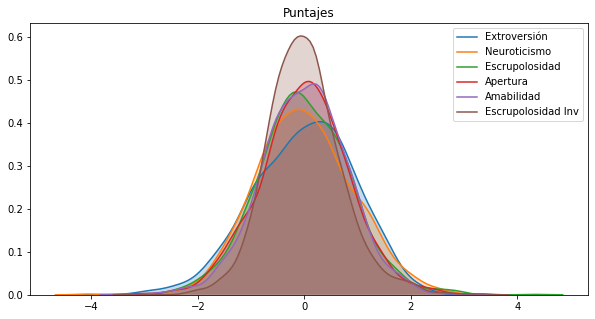

In [8]:
# Extrae puntajes

extract_factor_scores = pd.DataFrame(
    factorize2.transform(df_preguntas),
    columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5", "Factor6"]
)

# Incorpora puntajes a la base de datos

factores = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6']

for i in factores:
    df_NN[i] = extract_factor_scores.loc[:, i].values

# Grafica puntajes

plt.figure(figsize=(10, 5))
plt.title("Puntajes")
sns.kdeplot(extract_factor_scores.loc[:, 'Factor1'], shade=True, label="Extroversión")
sns.kdeplot(extract_factor_scores.loc[:, 'Factor2'], shade=True, label="Neuroticismo")
sns.kdeplot(extract_factor_scores.loc[:, 'Factor3'], shade=True, label="Escrupolosidad")
sns.kdeplot(extract_factor_scores.loc[:, 'Factor4'], shade=True, label="Apertura")
sns.kdeplot(extract_factor_scores.loc[:, 'Factor5'], shade=True, label="Amabilidad")
sns.kdeplot(extract_factor_scores.loc[:, 'Factor6'], shade=True, label="Escrupolosidad Inv")
plt.legend()

In [12]:
model_extroversion= smf.ols('Factor1 ~ gender + education + age', data=df_NN).fit()
model_neuroticismo= smf.ols('Factor2 ~ gender + education + age', data=df_NN).fit()
model_escrupolosidad= smf.ols('Factor3 ~ gender + education + age', data=df_NN).fit()
model_apertura= smf.ols('Factor4 ~ gender + education + age', data=df_NN).fit()
model_amabilidad= smf.ols('Factor5 ~ gender + education + age', data=df_NN).fit()

display(model_extroversion.summary())
display(model_neuroticismo.summary())
display(model_escrupolosidad.summary())
display(model_apertura.summary())
display(model_amabilidad.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor1   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     19.25
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           2.53e-12
Time:                        00:35:08   Log-Likelihood:                -3028.1
No. Observations:                2236   AIC:                             6064.
Df Residuals:                    2232   BIC:                             6087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6681      0.100     -6.654      0.000      -0.865      -0.471
gender         0.1820      0.042      4.304      0.000       0.099       0.265
education      0.0138      0.018      0.747      0.455      -0.022       0.050
age            0.0108      0.002      5.637      0.000       0.007       0.015
==============================================================================
Omnibus:                       29.416   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.280
Skew:                          -0.279   Prob(JB):                     2.66e-07
Kurtosis:                       2.882   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor2   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     22.83
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.49e-14
Time:                        00:35:08   Log-Likelihood:                -2944.6
No. Observations:                2236   AIC:                             5897.
Df Residuals:                    2232   BIC:                             5920.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4099      0.097     -4.238      0.000      -0.600      -0.220
gender         0.3234      0.041      7.938      0.000       0.243       0.403
education      0.0050      0.018      0.284      0.777      -0.030       0.040
age           -0.0050      0.002     -2.681      0.007      -0.009      -0.001
==============================================================================
Omnibus:                        4.885   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.931
Skew:                           0.086   Prob(JB):                       0.0849
Kurtosis:                       3.153   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor3   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     11.48
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.82e-07
Time:                        00:35:08   Log-Likelihood:                -2824.2
No. Observations:                2236   AIC:                             5656.
Df Residuals:                    2232   BIC:                             5679.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1173      0.092      1.280      0.201      -0.062       0.297
gender        -0.1914      0.039     -4.959      0.000      -0.267      -0.116
education      0.0441      0.017      2.621      0.009       0.011       0.077
age            0.0021      0.002      1.194      0.233      -0.001       0.006
==============================================================================
Omnibus:                       26.046   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.361
Skew:                           0.156   Prob(JB):                     3.46e-08
Kurtosis:                       3.521   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor4   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     31.89
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           3.49e-20
Time:                        00:35:08   Log-Likelihood:                -2708.5
No. Observations:                2236   AIC:                             5425.
Df Residuals:                    2232   BIC:                             5448.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3343      0.087     -3.841      0.000      -0.505      -0.164
gender         0.3201      0.037      8.734      0.000       0.248       0.392
education     -0.0694      0.016     -4.343      0.000      -0.101      -0.038
age            0.0007      0.002      0.422      0.673      -0.003       0.004
==============================================================================
Omnibus:                        5.617   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                6.549
Skew:                          -0.026   Prob(JB):                       0.0378
Kurtosis:                       3.260   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor5   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     11.77
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.20e-07
Time:                        00:35:08   Log-Likelihood:                -2667.8
No. Observations:                2236   AIC:                             5344.
Df Residuals:                    2232   BIC:                             5366.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4916      0.085     -5.753      0.000      -0.659      -0.324
gender         0.1227      0.036      3.410      0.001       0.052       0.193
education      0.0475      0.016      3.025      0.003       0.017       0.078
age            0.0046      0.002      2.795      0.005       0.001       0.008
==============================================================================
Omnibus:                       22.102   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.313
Skew:                          -0.104   Prob(JB):                     1.59e-07
Kurtosis:                       3.541   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""